# 課題3

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    #実際に分類する関数
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
       
        return y

    
    
    #損失関数
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
       #交差エントロピー誤差→出力yがtに一致するときに1を返す
        return cross_entropy_error(y, t)
    
    
    def accuracy(self, x, t):
        y = self.predict(x)
        #np.argmax(最大値を取得したい配列,軸方向)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
      
    #勾配を求める 　grads変数には、各パラメータの勾配が格納される
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7843, 0.7893
train acc, test acc | 0.8798833333333334, 0.8859
train acc, test acc | 0.8994166666666666, 0.9043
train acc, test acc | 0.9094, 0.9121
train acc, test acc | 0.9153166666666667, 0.918
train acc, test acc | 0.9203333333333333, 0.9223
train acc, test acc | 0.9237333333333333, 0.9282
train acc, test acc | 0.9282, 0.93
train acc, test acc | 0.9313833333333333, 0.9331
train acc, test acc | 0.9341833333333334, 0.9349
train acc, test acc | 0.9363333333333334, 0.936
train acc, test acc | 0.9386, 0.9389
train acc, test acc | 0.9414333333333333, 0.94
train acc, test acc | 0.9432, 0.9418
train acc, test acc | 0.94465, 0.

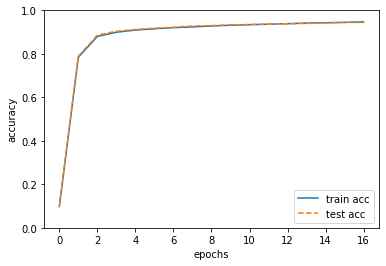

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) 

#入力画像サイズ28x28=784、出力は10通り
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) 

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1#今のと次のとの差

train_loss_list = []#損失関数の結果を格納
train_acc_list = []#学習するものの認識精度の結果を格納
test_acc_list = []#テストデータの認識精度の結果を格納

iter_per_epoch = max(train_size / batch_size, 1) #1エポックあたりの繰り返し数

#学習する
for i in range(iters_num):
    #60000個の訓練データからランダムに100(batch_size)個取り出す
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    #損失関数を計算
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #1エポックごとに認識精度を計算する
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 感想
過学習とは、データを学習しすぎて、与えてもらったデータのみにしか適用できない汎用性のないデータを獲得してしまうことである。それを防ぐために、訓練用データとテスト用データの認識精度を比べている。
テストデータの認識精度と訓練データの認識精度の違いはほぼないので過学習は起きていなくて、汎用データにも使える値が得られたとわかる。
今回はコードの理解に時間がかかった。ソースコードにコメントを書いて原理と流れはなんとなく理解できたが、まだ理解が及んでいないところがあるので適宜復習していきたい。python自体ももっと勉強しなきゃいけないと感じた。